
							 EXPENSE TRACKER




Enter monthly income:  1200


Monthly income set to: 1200 Rs



Do you want to add a new expense? (y/n):  y
Enter expense:  wer
Enter amount:  123
Enter mode of payment:  cash


  Expense Amount  Mode       Date & Time
0     wer    123  cash  2024-07-23 16:23



Do you want to add a new expense? (y/n):  y
Enter expense:  ert
Enter amount:  345
Enter mode of payment:  gpay


  Expense Amount  Mode       Date & Time
0     wer    123  cash  2024-07-23 16:23
1     ert    345  gpay  2024-07-23 16:23



Do you want to add a new expense? (y/n):  y
Enter expense:  wer
Enter amount:  456
Enter mode of payment:  gpay


  Expense Amount  Mode       Date & Time
0     wer    123  cash  2024-07-23 16:23
1     ert    345  gpay  2024-07-23 16:23
2     wer    456  gpay  2024-07-23 16:23



Do you want to add a new expense? (y/n):  n



Total Expenses: 924.00 Rs
Expense
ert    345
wer    579
Name: Amount, dtype: object

Total Savings: 276.00 Rs


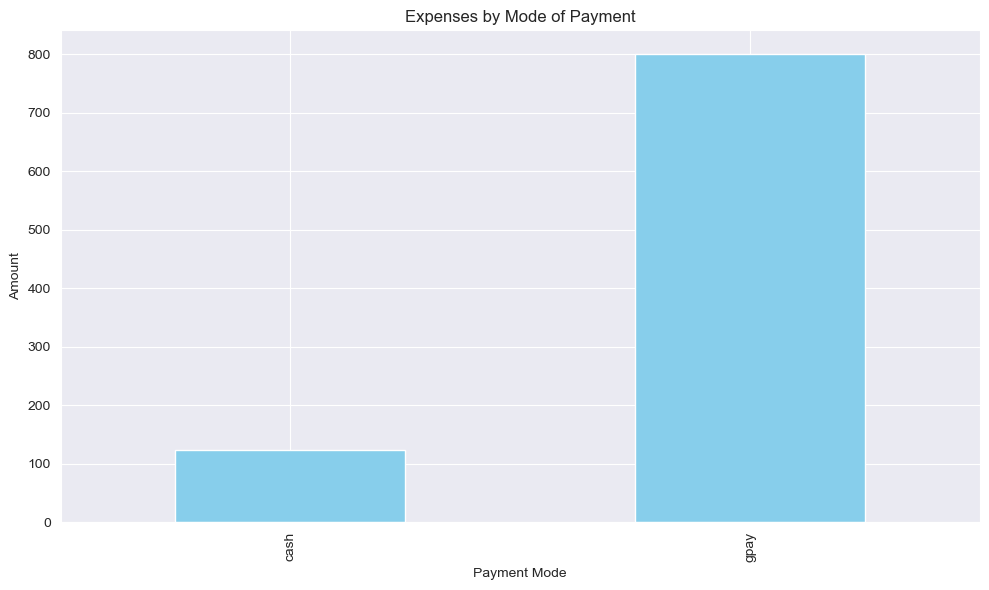

In [12]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

class ExpenseTracker:
    def __init__(self):
        print("\n\t\t\t\t\t\t\t EXPENSE TRACKER")
        self.monthly_income = int(input("\n\nEnter monthly income: "))
        print(f"Monthly income set to: {self.monthly_income} Rs")
        self.expense_df = pd.DataFrame(columns=["Expense", "Amount", "Mode", "Date & Time"])

    def expenses(self):
        expense = input("Enter expense: ")
        amount = int(input("Enter amount: "))
        mode = input("Enter mode of payment: ")
        date = dt.datetime.now().strftime('%Y-%m-%d %H:%M')
        new_expense = pd.DataFrame({"Expense": [expense], "Amount": [amount], "Mode": [mode], "Date & Time": [date]})
        self.expense_df = pd.concat([self.expense_df, new_expense], ignore_index=True)
        print(self.expense_df)

    def add_expense(self):
        while True:
            choice = input("\nDo you want to add a new expense? (y/n): ")
            if choice.lower() == 'y':
                self.expenses()
            elif choice.lower() == 'n':
                break
            else:
                print("Invalid choice, please enter 'y' or 'n'.")

    def total(self):
        total_expense = self.expense_df["Amount"].sum()
        print(f"\nTotal Expenses: {total_expense:.2f} Rs")
        group=self.expense_df.groupby("Expense").agg("Amount").sum()
        print(group)

    def savings(self):
        total_expense = self.expense_df["Amount"].sum()
        total_saving = self.monthly_income - total_expense
        print(f"\nTotal Savings: {total_saving:.2f} Rs")

    def graph(self):
        plt.figure(figsize=(10, 6))
        expense_by_mode = self.expense_df.groupby("Mode")["Amount"].sum()
        expense_by_mode.plot(kind='bar', color='skyblue')
        plt.title('Expenses by Mode of Payment')
        plt.xlabel('Payment Mode')
        plt.ylabel('Amount')
        plt.tight_layout()
        sns.set_style(style="darkgrid")
        plt.show()

app = ExpenseTracker()
app.add_expense()
app.total()
app.savings()
app.graph()

